## About the Dataset
**The Pima Indians Diabetes Dataset is a collection of medical records for 768 female patients of Pima Indian heritage. 1  It includes various diagnostic measurements such as glucose levels, blood pressure, and BMI, aiming to predict the onset of diabetes.**

### Data Cleaning and EDA



In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Observing shape of dataset
df.shape

(768, 9)

In [4]:
# Observing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# checking for null values
# creating a function to do so
def null_counter(df):
  col=df.columns
  for c in col:
    print(f"Null Values in column '{c}' : {df[c].isnull().sum()}")

null_counter(df)

Null Values in column 'Pregnancies' : 0
Null Values in column 'Glucose' : 0
Null Values in column 'BloodPressure' : 0
Null Values in column 'SkinThickness' : 0
Null Values in column 'Insulin' : 0
Null Values in column 'BMI' : 0
Null Values in column 'DiabetesPedigreeFunction' : 0
Null Values in column 'Age' : 0
Null Values in column 'Outcome' : 0


In [6]:
# checking for unique values
df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


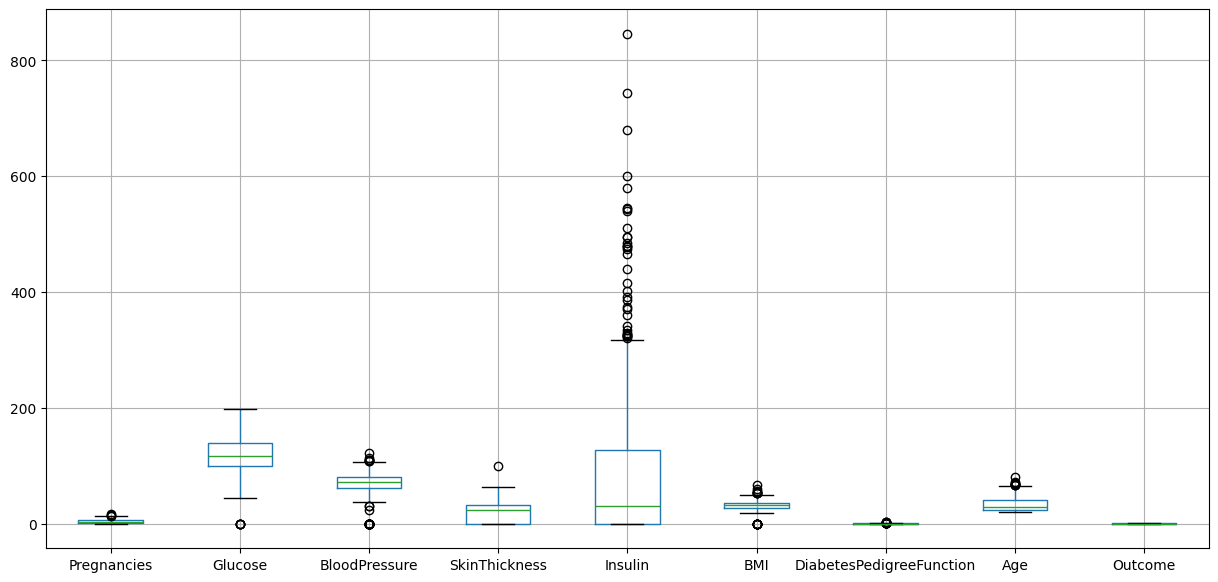

In [7]:
# detecting outliers using boxplot
fig = plt.figure(figsize=(15,7))
df.boxplot()
plt.show()

In [8]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# checking for certain value count
def val_count(df,colu,val):
    print(f" No of '{val}' in column {colu} : {df[df[colu]==val].value_counts().sum()}")


val_count(df,'Glucose',0)
val_count(df,'BloodPressure',0)
val_count(df,'SkinThickness',0)
val_count(df,'BMI',0)

# Glucose levels cannot be zero
# Blood pressure cannot be zero
# SkinThickness cannot be zero
# BMI cannot be zero

 No of '0' in column Glucose : 5
 No of '0' in column BloodPressure : 35
 No of '0' in column SkinThickness : 227
 No of '0' in column BMI : 11


In [10]:
# creating copy of dataframe
df_copy = df.copy()

In [11]:
# Imputing 0 values with mean values

# columns to be imputed
cols = ['Glucose','BloodPressure','SkinThickness','BMI']

for col in cols:
  df_copy.loc[df_copy[col] == 0, col] = int(df_copy[col].mean())


In [12]:
# Creating a function which can detect certain value in a column
def find_val(df,val):
  cols = df.columns
  for col in cols:
    if df_copy[col].isin([val]).any():
      print(f"Value {val} exists in the column '{col}'")

find_val(df_copy,0)

# Hence, 0 values have been handled

Value 0 exists in the column 'Pregnancies'
Value 0 exists in the column 'Insulin'
Value 0 exists in the column 'Outcome'


In [13]:
## Some EDA

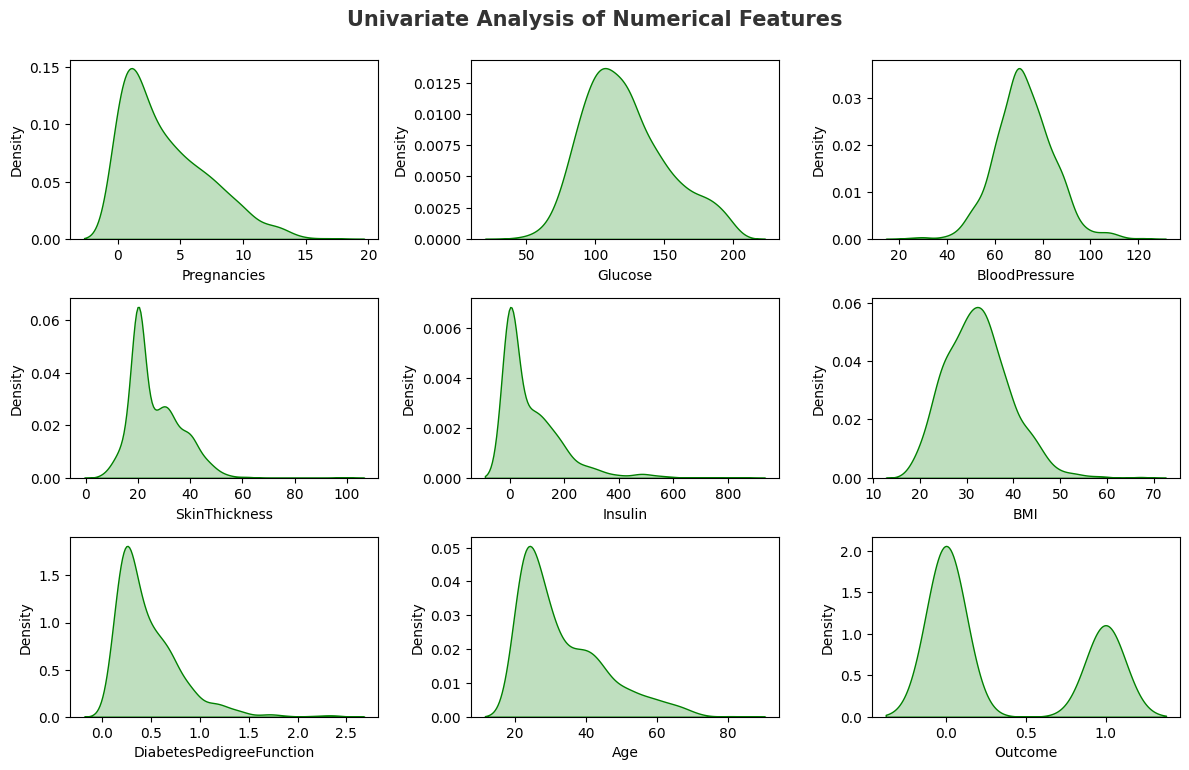

In [14]:
plt.figure(figsize=(12,12))
plt.suptitle(t='Univariate Analysis of Numerical Features', fontsize=15, fontweight='bold', alpha=0.8, y=1)

for i in range(0,len(df_copy.columns)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(x= df_copy[df_copy.columns[i]], fill=True, color='g')
  plt.xlabel(df_copy.columns[i])
  plt.tight_layout()


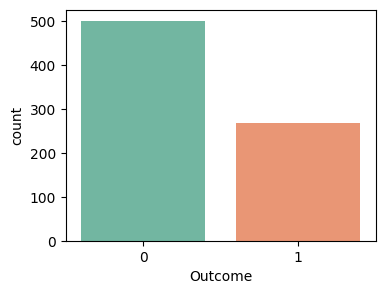

In [15]:
import warnings
warnings.filterwarnings('ignore')
# Observing target column
# plotting countplot

fig = plt.figure(figsize=(4,3))

sns.countplot(x=df_copy['Outcome'], palette="Set2")

plt.show()

In [16]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,20,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,0,30.1,0.349,47,1


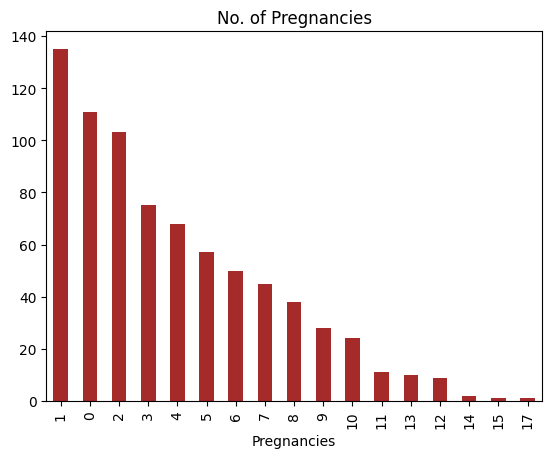

In [17]:
# Observing 'Pregnancies' column

df_copy['Pregnancies'].value_counts().plot(kind='bar',title='No. of Pregnancies', color='brown')
plt.show()

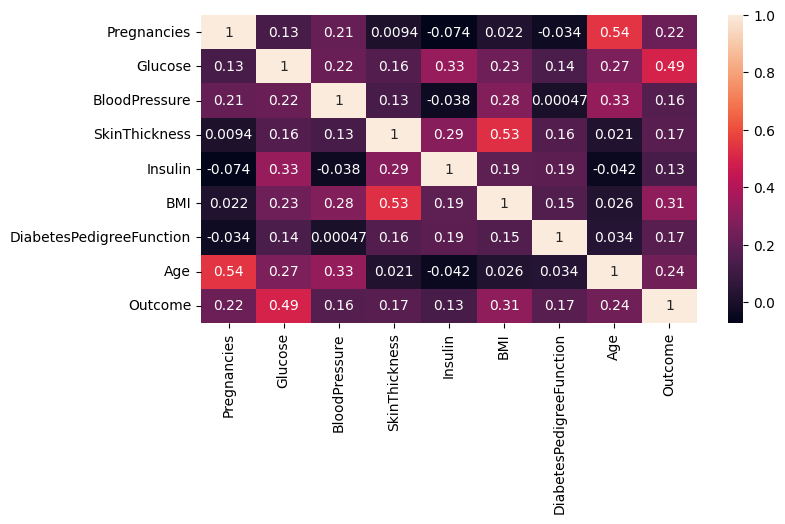

In [18]:
# Observing correalation
plt.figure(figsize=(8,4))
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

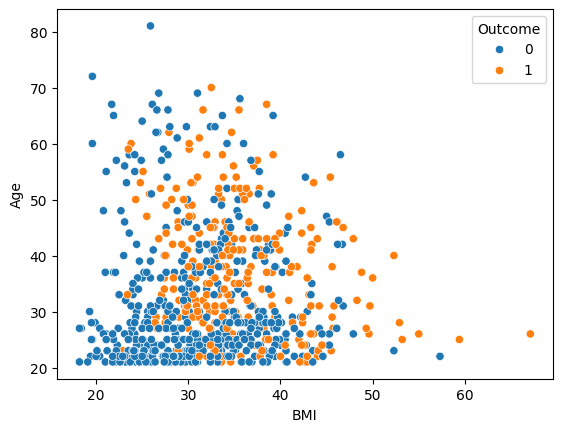

In [19]:
# Observing 'BMI' and 'Age' columns
sns.scatterplot(data=df_copy, x='BMI',y='Age',hue='Outcome')
plt.show()

# Obseravation
# Data shows that, People who have 'BMI' greater than 25 approx and
# 'Age' greater than 27-28 approx are mostly diabetic

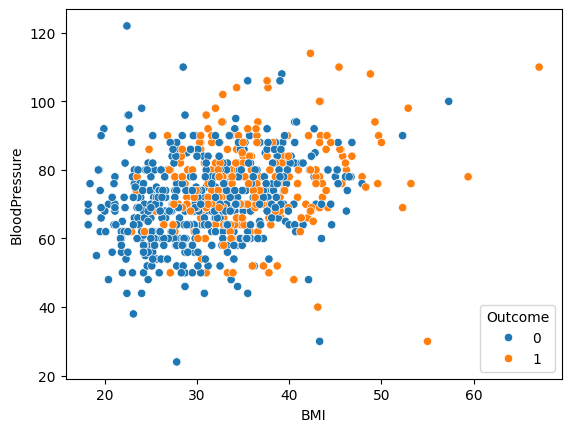

In [20]:
# Observing 'BMI' and 'BloodPressure' columns
sns.scatterplot(data=df_copy, x='BMI',y='BloodPressure',hue='Outcome')
plt.show()

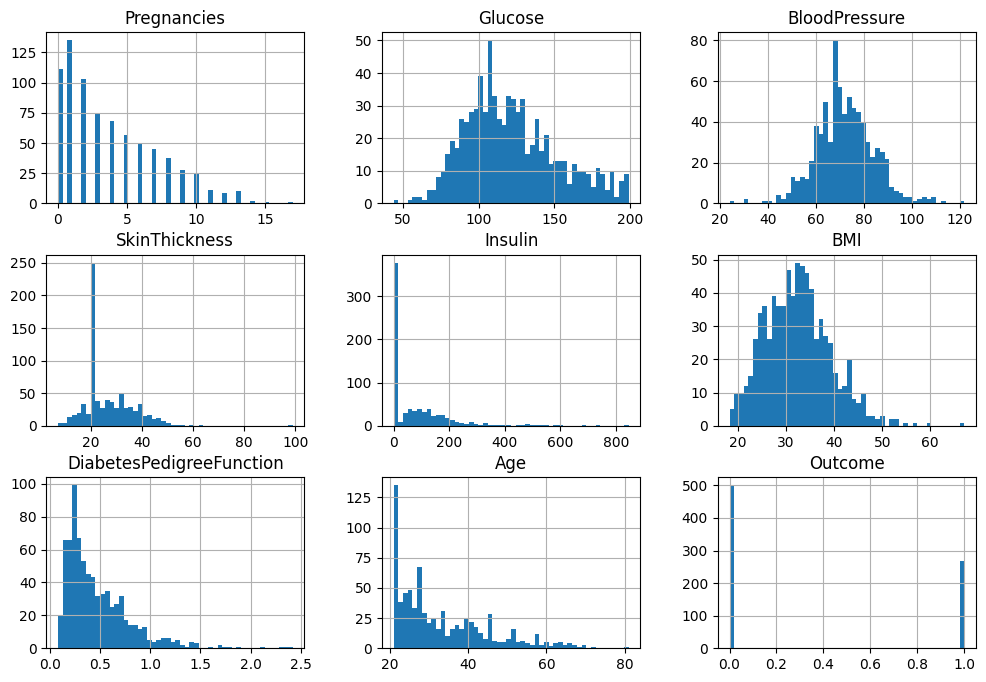

In [21]:
# plot density plot for all the features
df_copy.hist(bins=50, figsize=(12,8))
plt.show()

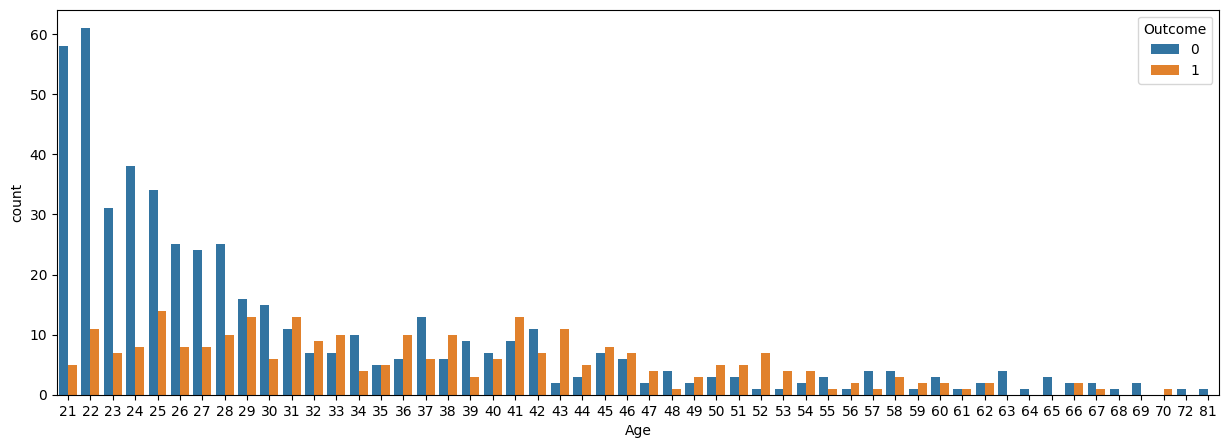

In [22]:
# Age wise observation of having diabetes
plt.figure(figsize=(15,5))
sns.countplot(data = df_copy, x='Age', hue='Outcome')
plt.show()

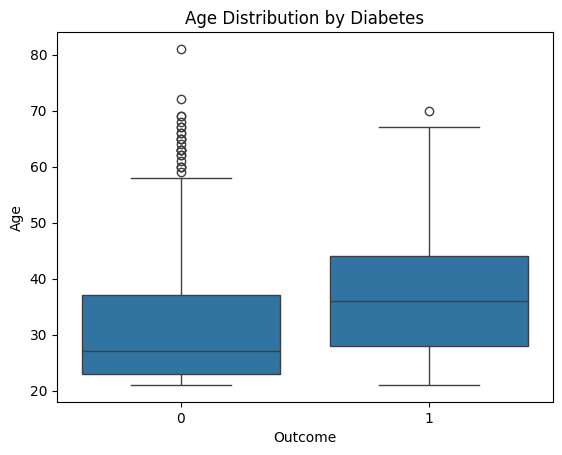

In [23]:
#  Relationship between glucose levels and diabetes.

sns.boxplot(x='Outcome', y='Age', data=df_copy)
plt.title('Age Distribution by Diabetes')
plt.show()

In [24]:
# Exporting to csv file
df_copy.to_csv('diabetes1.csv',index=False)

## Report and Insights Gained

### 1. **Dataset Overview**
The Pima Indians Diabetes Dataset consists of medical diagnostic measurements of 768 female patients of Pima Indian heritage. The goal is to predict the likelihood of diabetes based on these measurements.

Key attributes in the dataset include:
- Glucose levels
- Blood pressure
- Skin thickness
- Body Mass Index (BMI)
- Age
- Number of pregnancies
- Diabetes Outcome (binary classification: 0 = no diabetes, 1 = diabetes)

### 2. **Data Cleaning**
Upon initial inspection, it was found that certain diagnostic columns (Glucose, BloodPressure, SkinThickness, and BMI) contained zero values, which are not realistic for such medical attributes:
- **Glucose level cannot be 0**
- **Blood Pressure cannot be 0**
- **SkinThickness cannot be 0**
- **BMI cannot be 0**

To handle these invalid values, a data cleaning process was applied:
- Zero values were replaced by the mean of their respective columns.

### 3. **Univariate Analysis**
A univariate analysis was performed on each numerical feature to observe their distribution:
- The **Glucose**, **BMI**, and **Age** distributions appear slightly skewed, while most other features follow a normal distribution.
- Count plot of the target variable **Outcome** shows an imbalanced dataset, with a higher number of patients not diagnosed with diabetes compared to those diagnosed.

### 4. **Outlier Detection**
Boxplots were used to identify the presence of outliers in the dataset:
- Outliers were observed in attributes like **Insulin**, **SkinThickness**, and **Pregnancies**.

### 5. **Correlation Analysis**
A heatmap was generated to explore the correlations between features:
- **Glucose** and **BMI** have a high positive correlation with the diabetes outcome, indicating that higher levels of these attributes are more likely to result in a diabetes diagnosis.
- **Pregnancies** and **Age** also show positive correlations with diabetes.

### 6. **Bivariate Analysis and Key Observations**
- A scatter plot of **BMI** vs. **Age** revealed that individuals with a BMI greater than 25 and age over 27-28 are more likely to be diagnosed with diabetes.
- A scatter plot of **BMI** vs. **BloodPressure** highlighted the relationship between these features and the diabetes outcome, with higher BMI values being more prevalent among diabetic individuals.
- Age-wise analysis indicated that the likelihood of diabetes increases with age, as reflected in the count plot.

### 7. **Feature-Specific Insights**
- **Pregnancies:** Most individuals in the dataset have fewer than 10 pregnancies, and there is a slight increase in diabetes occurrence with a higher number of pregnancies.
- **Glucose and Outcome:** Individuals with higher glucose levels are more likely to have diabetes.
- **Age and Outcome:** The boxplot of age distribution by diabetes outcome shows that older individuals tend to have a higher risk of developing diabetes.
